#Model setup and initial installations

In [1]:
from google.colab import drive
drive = drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Installing the yolov5 setup
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import os
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-163-g016e046 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (4 CPUs, 25.5 GB RAM, 23.5/166.8 GB disk)


In [3]:
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.0+cu118 (Tesla T4)


#Download and preparation of the dataset
We need a dataset like that:

3 folders train, val and test 

In each of these folder, a folder labels and a folder images

In [ ]:
#Copy the dataset to the good location
newpath = '/content/yolov5/datasets/airportscanner' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

#/content/drive/MyDrive/CRPSharedFolder/CRP__Dataset_Repartition = the path of your dataset
%cp -R /content/drive/MyDrive/CRP_Shared_Folder/CRP__Dataset_Repartition/Scenario_14 /content/yolov5/datasets/airportscanner 
%cp -R /content/drive/MyDrive/CRP_Shared_Folder/CRP__Dataset_Repartition/valid /content/yolov5/datasets/airportscanner 
%cp -R /content/drive/MyDrive/CRP_Shared_Folder/CRP__Dataset_Repartition/test /content/yolov5/datasets/airportscanner 

In [ ]:
# Change the folder name to train if needed
os.rename('/content/yolov5/datasets/airportscanner/Scenario_14', '/content/yolov5/datasets/airportscanner/train')

In [ ]:
#Download the custom hyperparameters file (you can change the hyperparameters by modifying this file)
!wget -P /content/yolov5/datasets/airportscanner https://raw.githubusercontent.com/nguyen-nhat-mai/object_detection/model_maxime/hyp.custom.airportscanner.yaml
#Download the information file regarding the dataset. It describes the classes as well as the train/val/test paths
!wget -P /content/yolov5/datasets/airportscanner https://raw.githubusercontent.com/nguyen-nhat-mai/object_detection/model_maxime/dataset.airportscanner.yaml

--2023-05-03 14:53:09--  https://raw.githubusercontent.com/nguyen-nhat-mai/object_detection/model_maxime/hyp.custom.airportscanner.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1407 (1.4K) [text/plain]
Saving to: ‘/content/yolov5/datasets/airportscanner/hyp.custom.airportscanner.yaml’

hyp.custom.airports 100%[===================>]   1.37K  --.-KB/s    in 0s      

2023-05-03 14:53:10 (24.4 MB/s) - ‘/content/yolov5/datasets/airportscanner/hyp.custom.airportscanner.yaml’ saved [1407/1407]

--2023-05-03 14:53:10--  https://raw.githubusercontent.com/nguyen-nhat-mai/object_detection/model_maxime/dataset.airportscanner.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting t

#Training

In [ ]:
%cd /content/yolov5
!python train.py \
--img 416 \
--batch 32 \
--epochs 100 \
--data /content/yolov5/datasets/airportscanner/dataset.airportscanner.yaml \
--weights yolov5s.pt \
--cache \
--save-period 1 \
--bbox_interval 1 \
--optimizer Adam \
--hyp /content/yolov5/datasets/airportscanner/hyp.custom.airportscanner.yaml #\ #to fix
#--resume #if you want to resume training

#Do not forgot to save your best model after training!
#Note that lots of plots, predicted images examples and other can be found in the runs/train folder


/content/yolov5
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/datasets/airportscanner/dataset.airportscanner.yaml, hyp=/content/yolov5/datasets/airportscanner/hyp.custom.airportscanner.yaml, epochs=100, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=Adam, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epoc

#Training monitoring

In [ ]:
#To visualize the training on tensorboard dev
#logdir = precise the path to the result of the run
#name = name of your experiment
#description = your description
#one_shot = means that it stops the workflow once everything is uploaded

!tensorboard dev upload --logdir runs/train \
  --name "YOLOv5" \
  --description "Scenario_14" \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

runs/train

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   VPZ-BRV-BSH



New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/SpNX4IKtRT2MWJ41Arospw/

[2023-05-03T16:27:17] Started scanning logdir.
[2023-05-03T16:27:19] Total uploaded: 1300 scalars

# Predicting
*Reference:* Ultralytics. (2021). YOLOv5 Issue #36: YOLOv5 on new datasets. Retrieved from https://github.com/ultralytics/yolov5/issues/36

In [ ]:
from PIL import Image

In [ ]:
# Navigate to directory that contains 'yolov5'
os.chdir('/content/')
os.getcwd()

'/content'

In [ ]:
# Load custom model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/CRP_Shared_Folder/Results/Scenario_14/best.pt')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-163-g016e046 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)



requirements: /content/requirements.txt not found, check failed.


Fusing layers... 
Model summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [ ]:
# Inference Settings
model.conf = 0.1  # confidence threshold
model.iou = 0.2  # IoU threshold

image 1/4: 452x612 1 HandGun
image 2/4: 861x861 1 Shuriken
image 3/4: 1712x2136 1 RazorBlade
image 4/4: 2208x2688 1 Knife
Speed: 40.3ms pre-process, 12.2ms inference, 11.2ms NMS per image at shape (4, 3, 416, 416)


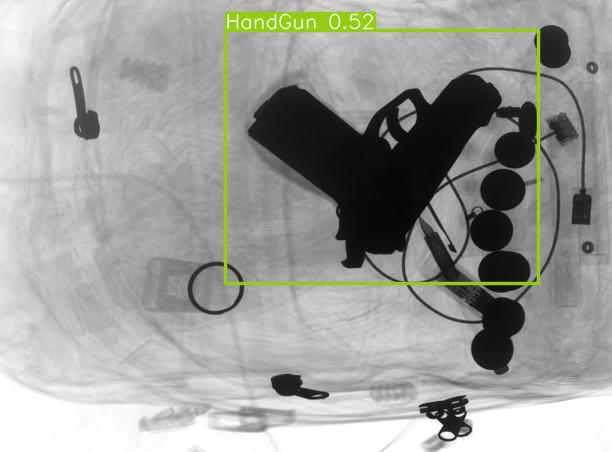

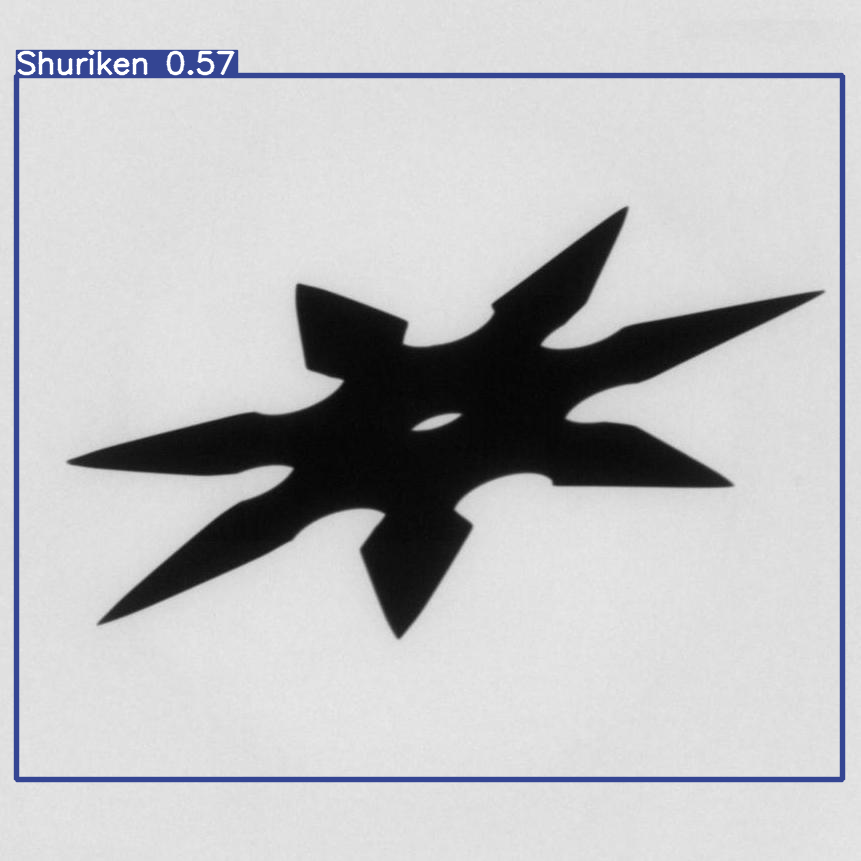

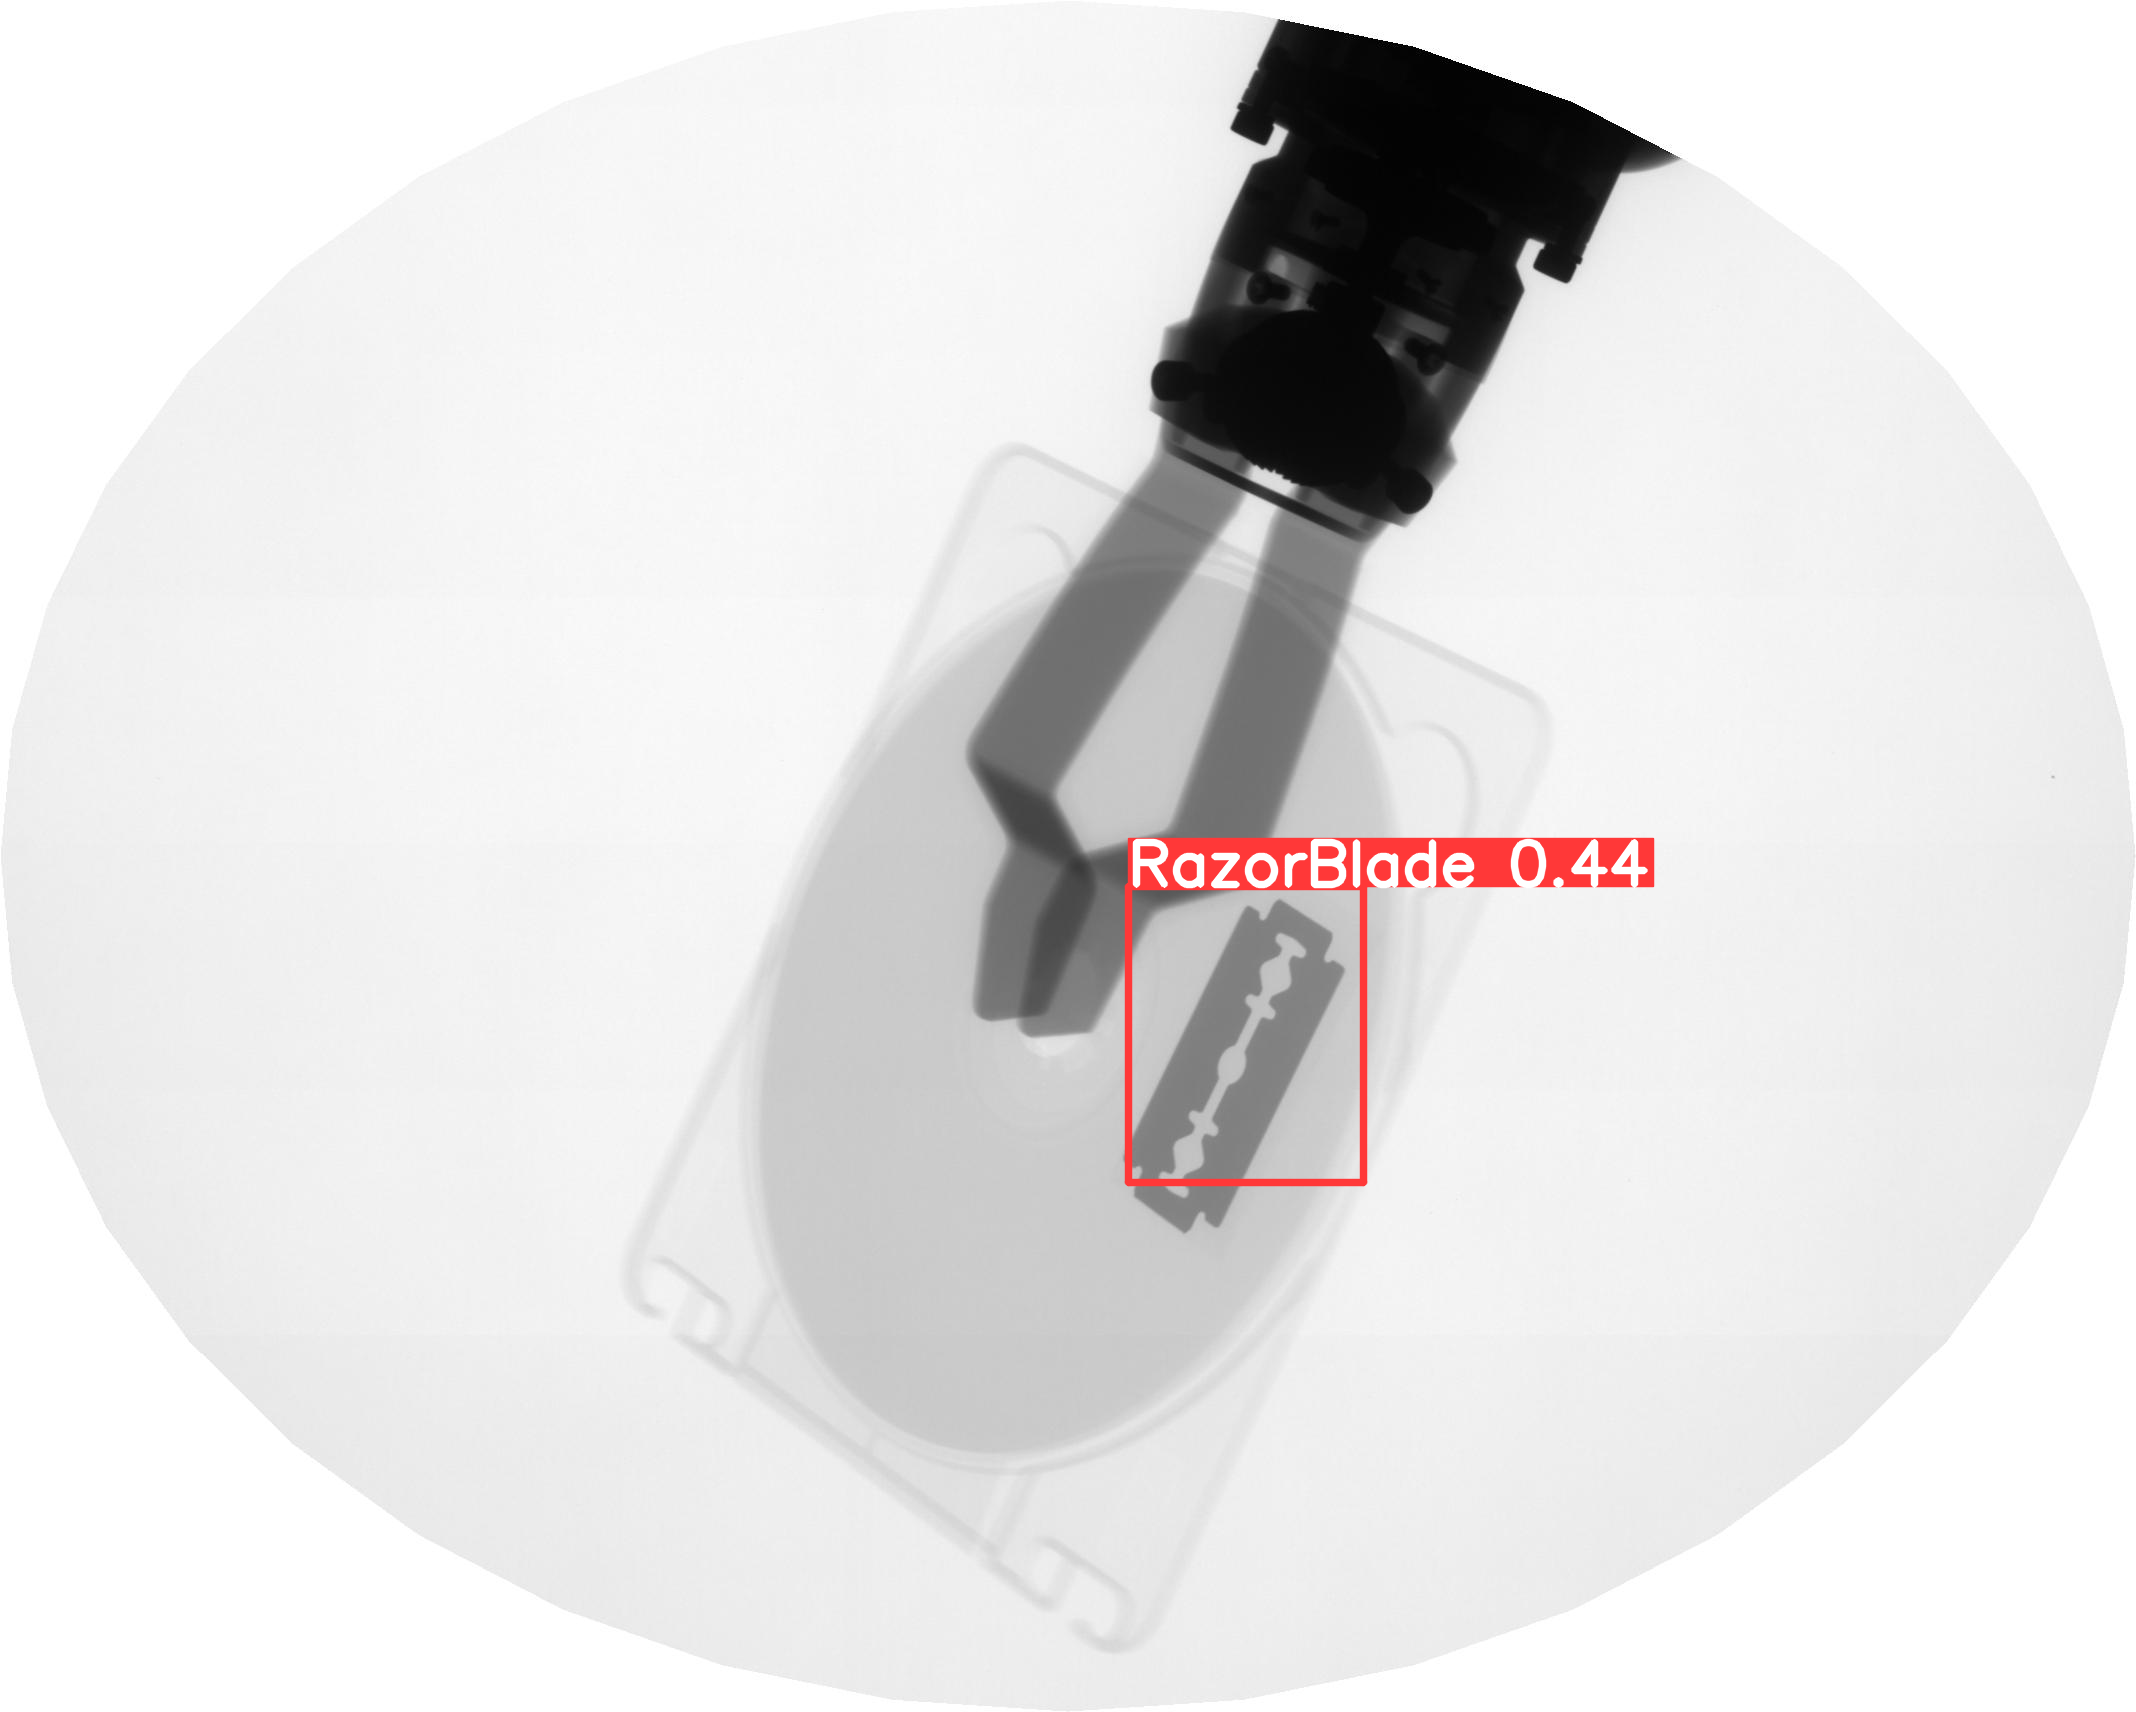

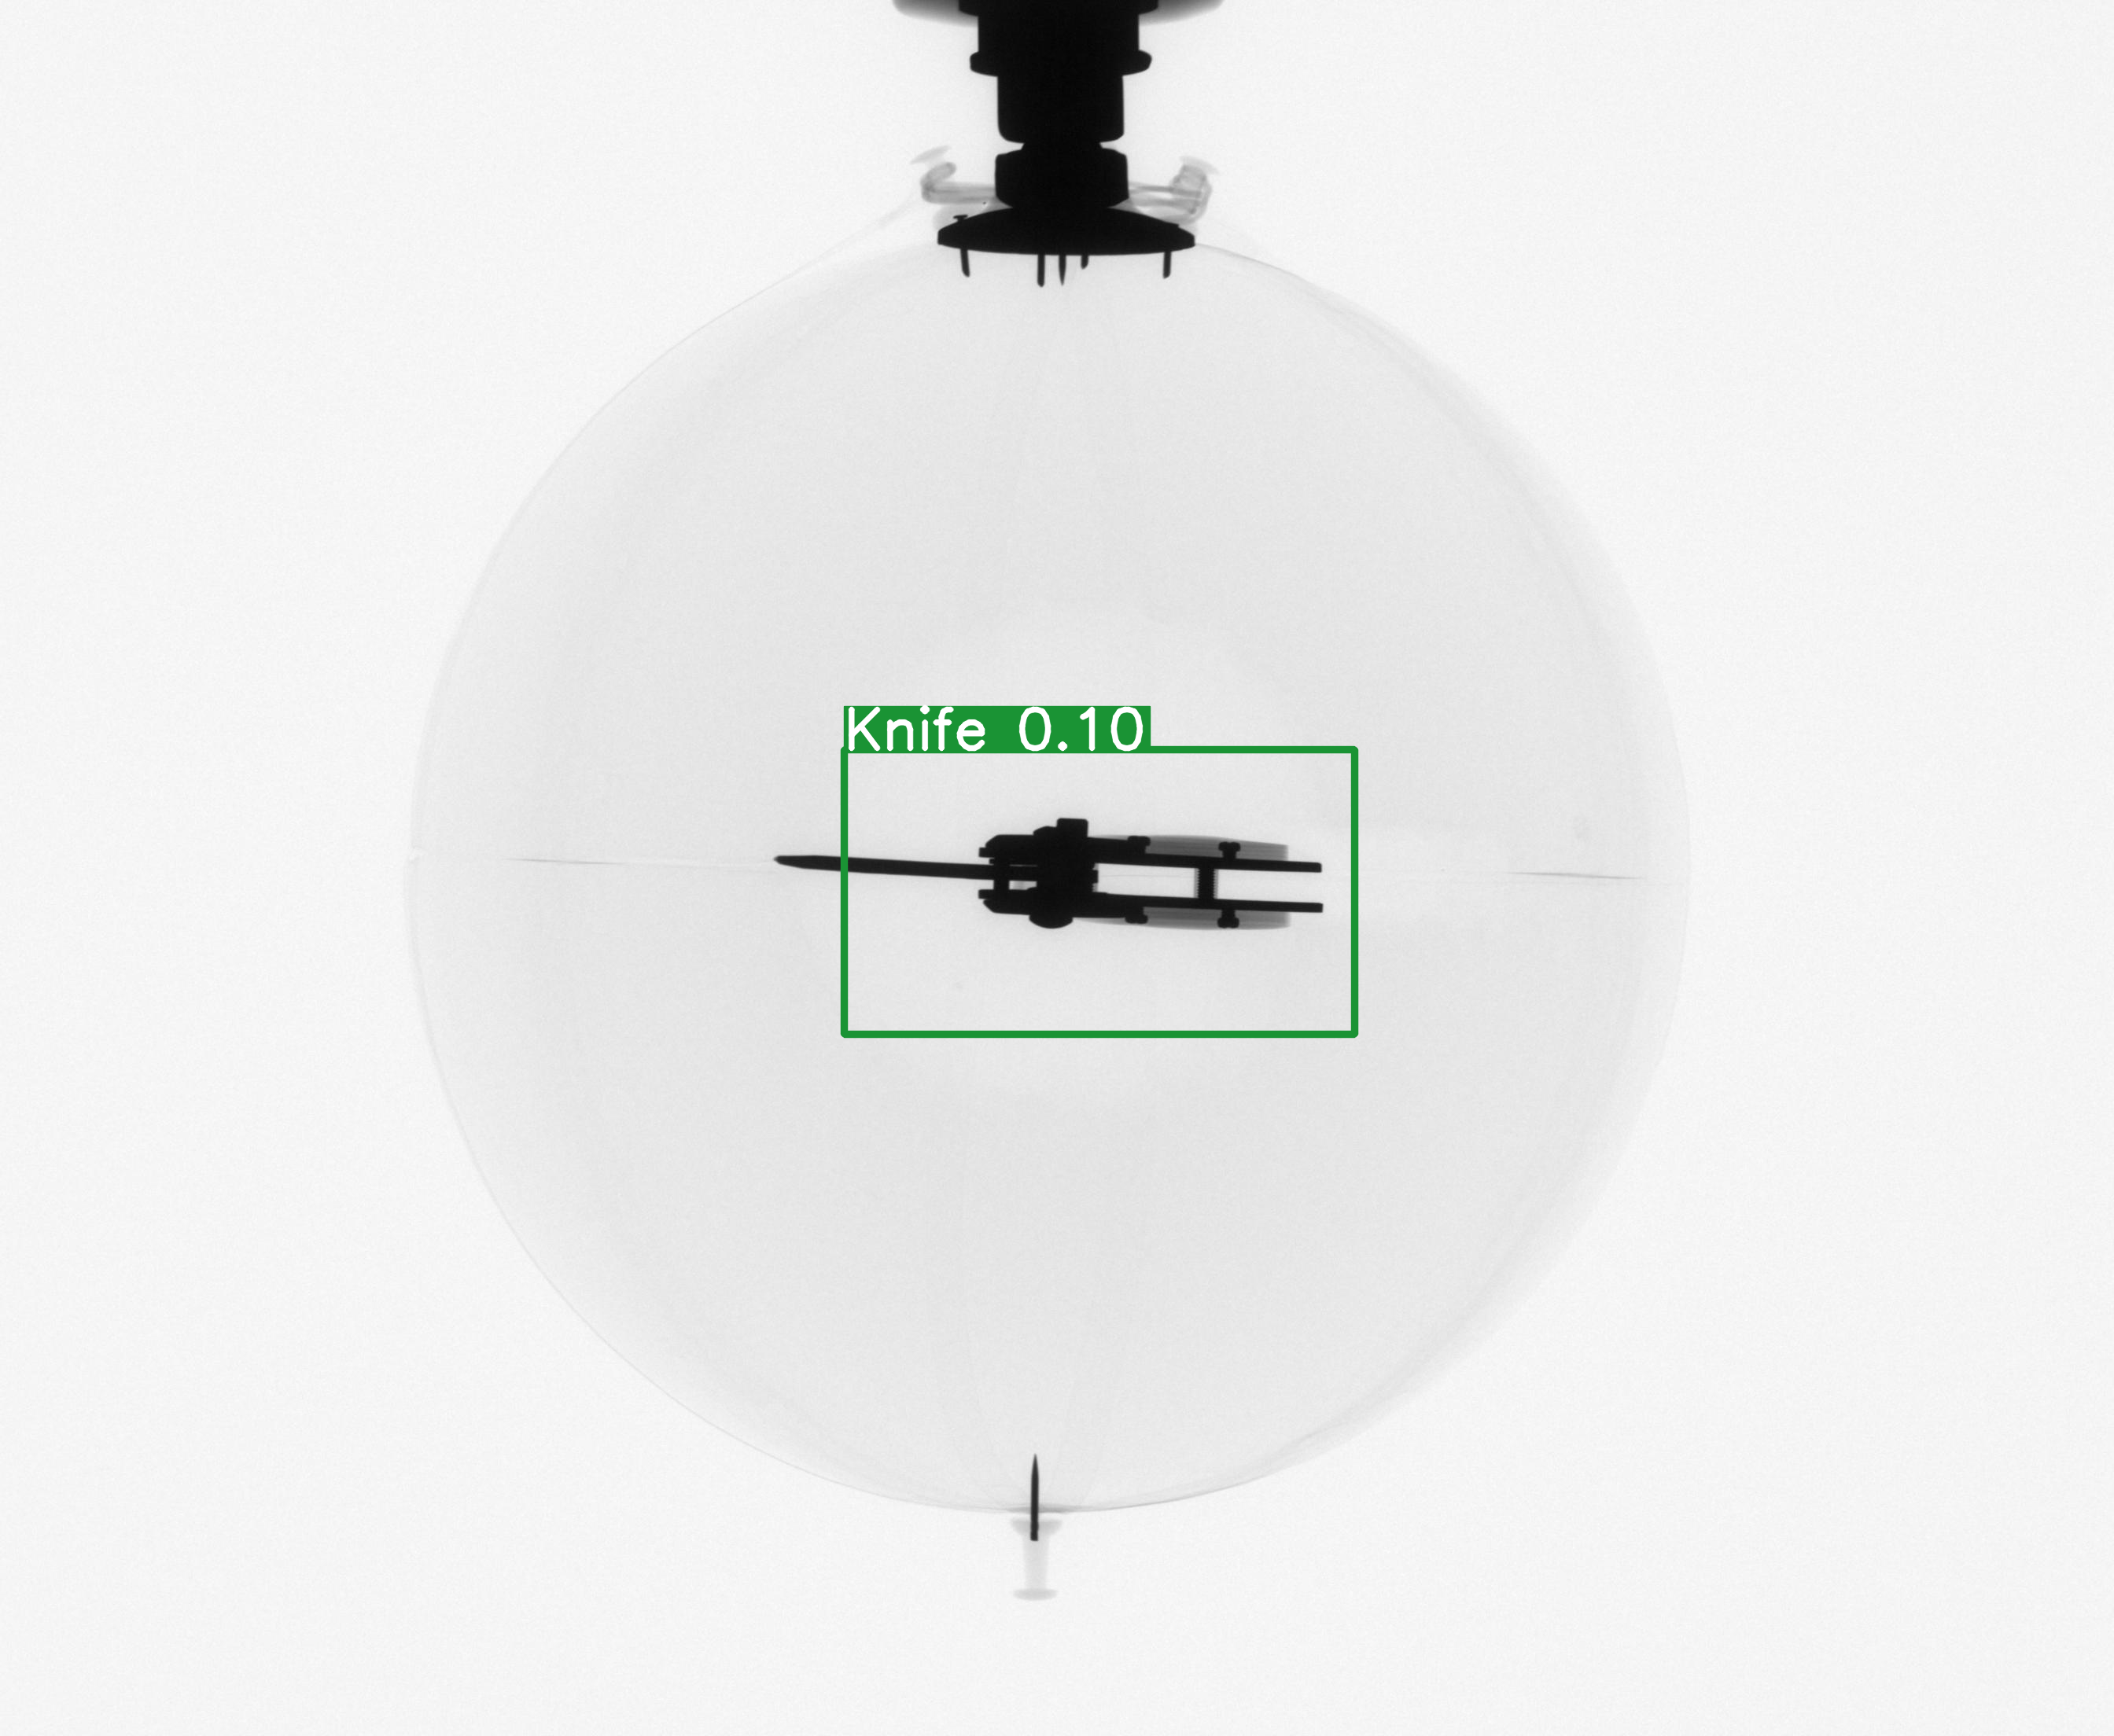

In [ ]:
# Set the path for test images and create a list of test image names
test_img_path = '/content/drive/MyDrive/CRP_Shared_Folder/CRP__Dataset_Repartition/valid/images/'
test_img = ['B0022_0002', 'B0050_0077', 'B0063_0002', 'B0075_0039']
# Create an empty list to store test images
open_img = []
# Loop through the test_img, open each image and append it to open_img
for img in test_img:
  open_img.append(Image.open(test_img_path+img+'.png'))
# Use the model to predict the classes and bounding boxes for the test images in pred_list, with a size of 416 pixels given the model is trained on images of size 416 pixels
results = model(open_img,size = 416)
# Print the predicted classes and bounding boxes for each image in results
results.print()
# Display the predicted bounding boxes on each image in results
results.show()